# Use Case : EDA Used Cars Dataset

You can access the data in this link .[Dataset](https://www.kaggle.com/austinreese/craigslist-carstrucks-data)
<br>
Vehicles for sale taken from Craigslist. Blank entries indicate that the listing did not provide said information.

* * * 

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Import Data
vehicles = pd.read_csv('craigslist-carstrucks-data/craigslistVehiclesFull.csv')
vehicles.head(3)

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0


In [5]:
vehicles.shape

(1723065, 26)

url          = Link to listing <br>
cityCraigs   = list region in which this listing was posted <br>
city_url     = Link to region page <br>
price        = Price of vehicle <br>
year         = Year of vehicle <br>
manufacturer = Manufacturer of vehicle <br>
make         = Make of vehicle <br>
condition    = Vehicle condition <br>
cylinders    = Number of cylinders <br>
fuel         = Type of fuel required <br>
odometer     = Miles traveled <br>
title_status = Title status (e.g. clean, missing, etc.) <br>
transmission = Type of transmission <br>
vin          = Vehicle Identification Number <br>
drive        = Drive of vehicle <br>
size         = Size of vehicle <br>
type         = Type of vehicle <br>
paint_color  = Color of vehicle <br>
image_url    = Link to image <br>
lat          = Latitude of listing <br>
long         = Longitude of listing <br>
county_fips  = Federal Information Processing Standards code <br>
county_name  = County of listing <br>
state_fips   = Federal Information Processing Standards code <br>
state_code   = 2 letter state code <br>
state_name   = State name <br>
weather      = Historical average temperature for location in October/November <br>

In [6]:
# Type of the Data
vehicles.dtypes

url              object
city             object
price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
lat             float64
long            float64
county_fips     float64
county_name      object
state_fips      float64
state_code       object
state_name       object
weather         float64
dtype: object

There are some variable that we can say "unique variable". We can said like that because we can't analyze that variable.

In [7]:
df = vehicles.drop(['url','image_url' ],axis=1)
df.head(3)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0


### Missing Value Detection

In [8]:
#count how many missing values per field (order)
df_null = df.isnull().sum().sort_values(ascending = False)
df_null

size            1123967
vin             1118215
type             702931
condition        700790
paint_color      695650
cylinders        691291
drive            661884
odometer         564054
manufacturer     136414
make              69699
weather           59428
county_fips       58833
county_name       58833
state_fips        58833
state_code        58833
fuel              10367
transmission       9022
year               6315
title_status       2554
lat                   0
state_name            0
long                  0
price                 0
city                  0
dtype: int64

In [9]:
# Detect the percentage of missing value
print('% Missing value of size =', round(df_null[0]/1723065 * 100))
print('% Missing value of vin =', round(df_null[1]/1723065 * 100))
print('% Missing value of type =', round(df_null[2]/1723065 * 100))

% Missing value of size = 65.0
% Missing value of vin = 65.0
% Missing value of type = 41.0


Because of there are two variable that have missing value more than 60%, so variable size and vin also deleted.

In [10]:
df1 = df.drop(['size','vin' ],axis=1)
df1.head(3)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0


In [11]:
# Change data type
df1['year'] = df1.year.astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 22 columns):
city            object
price           int64
year            object
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
drive           object
type            object
paint_color     object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(6), int64(1), object(15)
memory usage: 289.2+ MB


In [12]:
# separate data become numerical and categorical data
kategorik=['city', 'year','manufacturer','make', 'condition', 
           'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type',
           'paint_color', 'county_name', 'state_code', 'state_name']
numerical=df1.drop(kategorik,axis=1)
categorical=df1[kategorik]

In [13]:
numerical.describe()

,price,odometer,lat,long,county_fips,state_fips,weather
count,1.723065e+06,1.159011e+06,1.723065e+06,1.723065e+06,1.664232e+06,1.664232e+06,1.663637e+06
mean,1.075540e+05,1.136387e+05,3.878195e+01,-9.371198e+01,2.843053e+04,2.834410e+01,5.378706e+01
std,1.004439e+07,1.368603e+05,5.976412e+00,1.696519e+01,1.605423e+04,1.603224e+01,7.799381e+00
min,1.000000e+00,0.000000e+00,-8.481005e+01,-1.000000e+03,1.001000e+03,1.000000e+00,2.900000e+01
25%,3.295000e+03,5.800000e+04,3.491900e+01,-1.058010e+02,1.212300e+04,1.200000e+01,4.800000e+01
50%,7.000000e+03,1.070000e+05,3.940989e+01,-8.824070e+01,2.902100e+04,2.900000e+01,5.300000e+01
75%,1.499900e+04,1.520000e+05,4.255459e+01,-8.102650e+01,4.106700e+04,4.100000e+01,5.900000e+01
max,2.068627e+09,1.000000e+07,9.000000e+01,1.397061e+02,5.604500e+04,5.600000e+01,7.900000e+01


In [14]:
numerical.isnull().sum().sort_values(ascending = False)

odometer       564054
weather         59428
state_fips      58833
county_fips     58833
long                0
lat                 0
price               0
dtype: int64

In [27]:
# Fill missing value with mean - for numerical data
numerical = numerical.fillna((numerical.mean()))
numerical.isnull().sum().sort_values(ascending = False)

weather        0
state_fips     0
county_fips    0
long           0
lat            0
odometer       0
price          0
dtype: int64

In [16]:
categorical.describe()

,city,year,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,county_name,state_code,state_name
count,1723065,1723065,1586651,1653366,1022275,1031774,1712698,1720511,1714043,1061181,1020134,1027415,1664232,1664232,1723065
unique,470,127,53,107445,6,8,5,6,3,3,13,12,1834,51,52
top,cosprings,2007.0,ford,1500,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,Jefferson,CA,California
freq,8283,108117,292841,23346,443538,362142,1531426,1601315,1474784,445603,271265,228920,18920,154299,154299


In [17]:
categorical.isnull().sum().sort_values(ascending = False)

type            702931
condition       700790
paint_color     695650
cylinders       691291
drive           661884
manufacturer    136414
make             69699
state_code       58833
county_name      58833
fuel             10367
transmission      9022
title_status      2554
state_name           0
year                 0
city                 0
dtype: int64

#### mode of the categorical data

In [20]:
for cat in categorical :
    modus = categorical[cat].mode().values[0]
    categorical[cat] = categorical[cat].fillna(modus)

C:\Users\afifah064126\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
categorical.isnull().sum().sort_values(ascending = False)

state_name      0
state_code      0
county_name     0
paint_color     0
type            0
drive           0
transmission    0
title_status    0
fuel            0
cylinders       0
condition       0
make            0
manufacturer    0
year            0
city            0
dtype: int64

### Outlier Detection

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns 

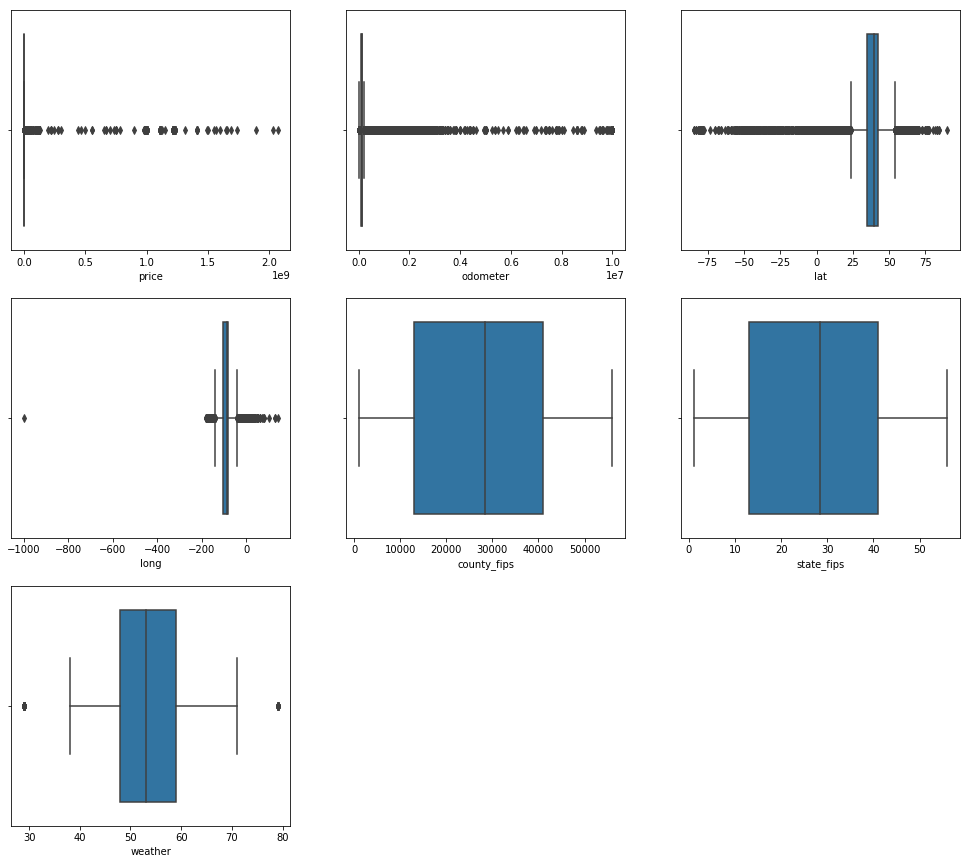

In [30]:
f=plt.figure(figsize=(17,15))
f.add_subplot(3,3,1)
sns.boxplot(numerical['price'])
f.add_subplot(3,3,2)
sns.boxplot(numerical['odometer'])
f.add_subplot(3,3,3)
sns.boxplot(numerical['lat'])
f.add_subplot(3,3,4)
sns.boxplot(numerical['long'])
f.add_subplot(3,3,5)
sns.boxplot(numerical['county_fips'])
f.add_subplot(3,3,6)
sns.boxplot(numerical['state_fips'])
f.add_subplot(3,3,7)
sns.boxplot(numerical['weather'])

From the box plot, we know that there are some variable that outliers. As we can see, variable that have outliers are variable *price, odometer, lat* and *long*.

In [ ]:
f=plt.figure(figsize=(17,15))
axes = 530
for cat in kategorik :
    axes += 1
    f.add_subplot(axes)
    sns.countplot(data = categorical, x=cat)
plt.show()

### Visualization
**Count Plot** for categorical data

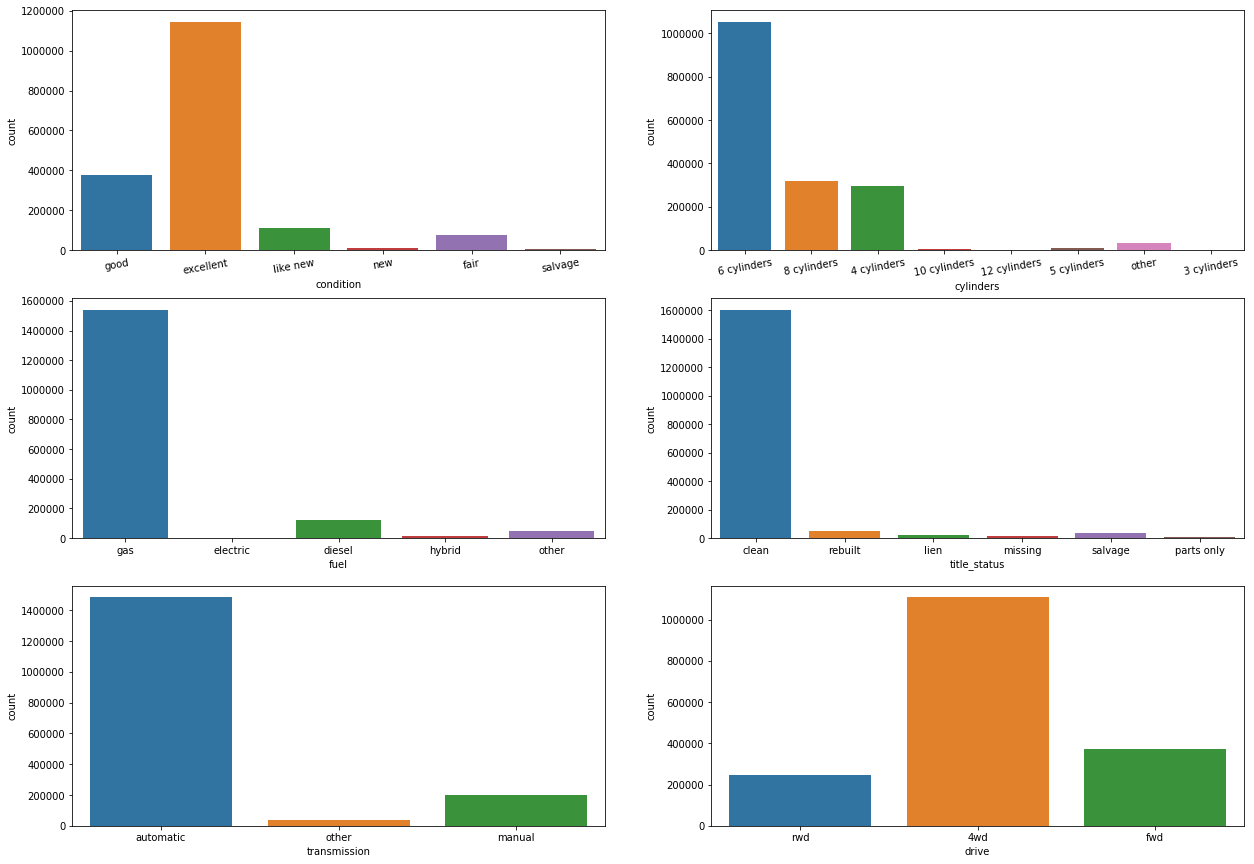

In [46]:
f=plt.figure(figsize=(21,15))
f.add_subplot(3,2,1)
sns.countplot(categorical['condition'])
plt.xticks(rotation=10)
f.add_subplot(3,2,2)
sns.countplot(categorical['cylinders'])
plt.xticks(rotation=10)
f.add_subplot(3,2,3)
sns.countplot(categorical['fuel'])
f.add_subplot(3,2,4)
sns.countplot(categorical['title_status'])
f.add_subplot(3,2,5)
sns.countplot(categorical['transmission'])
f.add_subplot(3,2,6)
sns.countplot(categorical['drive'])

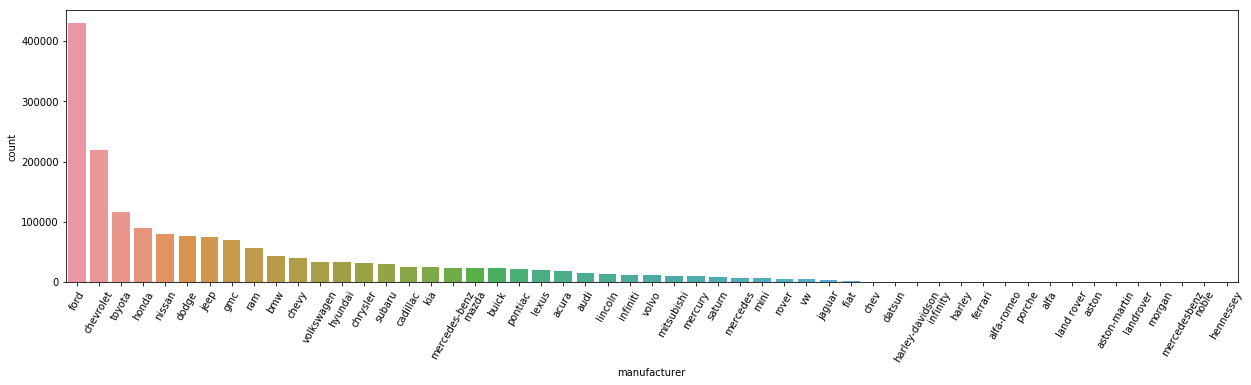

In [53]:
plt.figure(figsize=(21,5))
sns.countplot(categorical['manufacturer'], order = categorical['manufacturer'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

In [ ]:
plt.figure(figsize=(21,5))
sns.countplot(categorical['make'], order = categorical['make'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

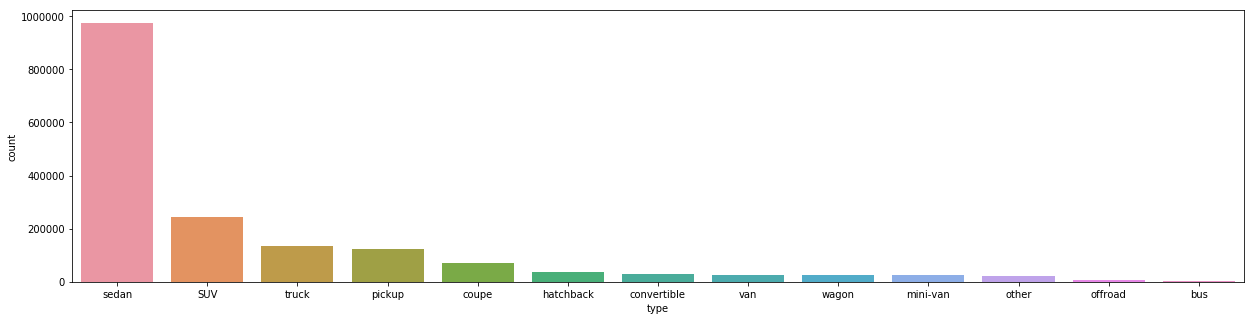

In [56]:
plt.figure(figsize=(21,5))
sns.countplot(categorical['type'], order = categorical['type'].value_counts().index)
plt.show()

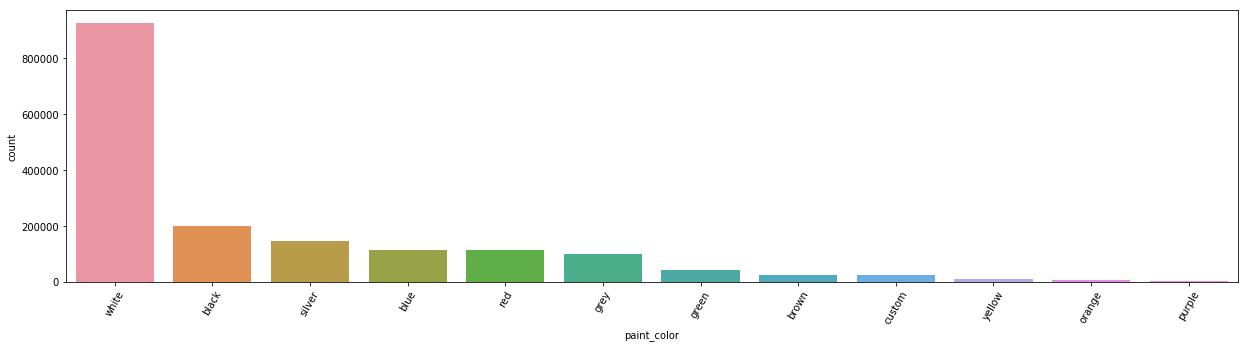

In [57]:
plt.figure(figsize=(21,5))
sns.countplot(categorical['paint_color'], categorical = data['paint_color'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

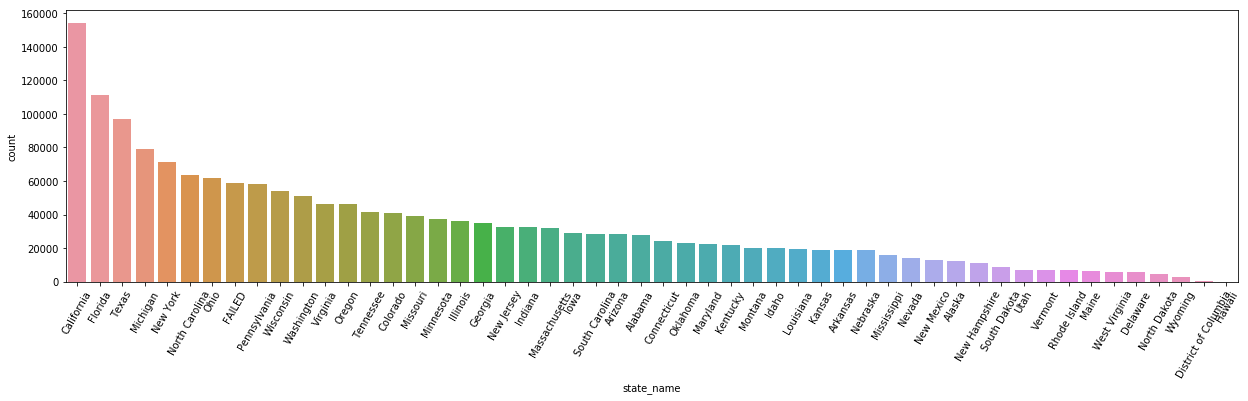

In [58]:
plt.figure(figsize=(21,5))
sns.countplot(categorical['state_name'], categorical = data['state_name'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

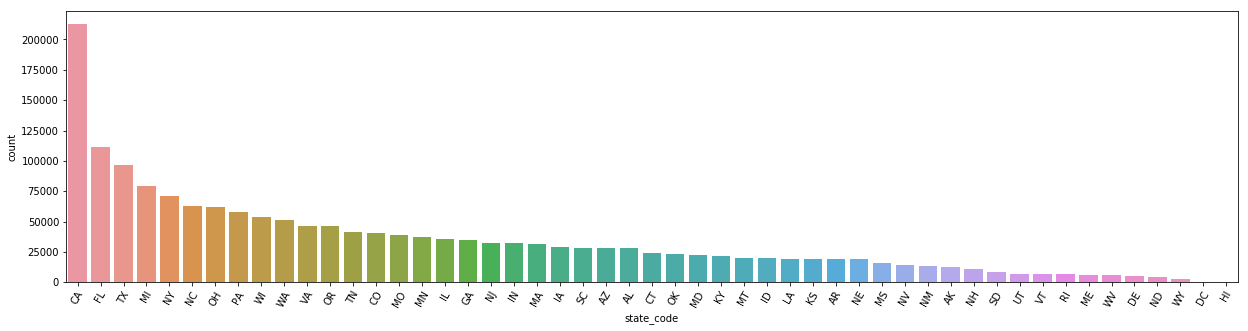

In [59]:
plt.figure(figsize=(21,5))
sns.countplot(categorical['state_code'], categorical = data['state_code'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

In [65]:
categorical[['state_name','state_code']].head()

,state_name,state_code
0,South Dakota,SD
1,South Dakota,SD
2,South Dakota,SD
3,Iowa,IA
4,Iowa,IA


In [68]:
categorical[['state_name','state_code']].tail()

,state_name,state_code
1723060,South Dakota,SD
1723061,South Dakota,SD
1723062,Illinois,IL
1723063,Iowa,IA
1723064,Iowa,IA


#### Correlation Plot

In [70]:
data = pd.concat([numerical, categorical], axis = 1)

MemoryError: 

In [29]:
data.head()

,price,odometer,lat,long,county_fips,state_fips,weather,city,year,manufacturer,...,cylinders,fuel,title_status,transmission,drive,type,paint_color,county_name,state_code,state_name
0,11900,43600.000000,43.4775,-96.7041,46083.0,46.0,38.0,marshall,2010.0,dodge,...,6 cylinders,gas,clean,automatic,rwd,coupe,red,Lincoln,SD,South Dakota
1,1515,113638.652723,44.7612,-96.6907,46039.0,46.0,38.0,marshall,1999.0,ford,...,6 cylinders,gas,clean,other,4wd,sedan,white,Deuel,SD,South Dakota
2,17550,113638.652723,44.1415,-103.2052,46093.0,46.0,38.0,marshall,2008.0,ford,...,6 cylinders,gas,clean,automatic,4wd,sedan,white,Meade,SD,South Dakota
3,2800,168591.000000,43.2845,-95.5930,19143.0,19.0,47.0,marshall,2004.0,ford,...,6 cylinders,gas,clean,automatic,fwd,sedan,grey,Osceola,IA,Iowa
4,400,217000.000000,43.0261,-94.4064,19109.0,19.0,47.0,marshall,2001.0,ford,...,6 cylinders,gas,clean,automatic,4wd,sedan,white,Kossuth,IA,Iowa


From the **Bar Plot** we know that :
- Vehicle condition that dominant is *excellent*
- *Six* is number of cylinders that dominant
- Type of fuel required that dominant is *gas*
- Title status that dominant is *clean*
- From 3 type of transmission automatic, manual and other, thed ominant is the *automatic*
- Drive of vehicle that dominant is *4wd*